In [1]:
#Loading the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#loading the data
df1= pd.read_csv("D:/ISB/MLUL/bill_data.csv")
df2= pd.read_csv("D:/ISB/MLUL/product_bill.csv")
df3= pd.read_csv("D:/ISB/MLUL/product_data.csv")
df4= pd.read_csv("D:/ISB/MLUL/product_attributes.csv")

C:\Users\DELL\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df5=df2.set_index('product_id').join(df3.set_index('id')).join(df4.set_index('product_id'))

In [4]:
df5.reset_index(inplace=True)

In [5]:
df5.rename(columns = {'index': 'product_id'},inplace=True)
df5.head()

,product_id,event_id,amount,quantity,name,marketable_name,name.1,Unnamed: 0,Item Color,Item Gender,Item Size,Season
0,982410,91625645,0,1,Lilo Two Pack Coated Flower Teal 00,Jewellery-Earrings,Jewellery,0.0,Teal,Women,0,SS19
1,982410,91627214,0,1,Lilo Two Pack Coated Flower Teal 00,Jewellery-Earrings,Jewellery,0.0,Teal,Women,0,SS19
2,982410,91627622,0,1,Lilo Two Pack Coated Flower Teal 00,Jewellery-Earrings,Jewellery,0.0,Teal,Women,0,SS19
3,982410,91632810,800,1,Lilo Two Pack Coated Flower Teal 00,Jewellery-Earrings,Jewellery,0.0,Teal,Women,0,SS19
4,982410,91638510,800,1,Lilo Two Pack Coated Flower Teal 00,Jewellery-Earrings,Jewellery,0.0,Teal,Women,0,SS19


In [6]:
df1.head()

,id,bill_no,created_on,amount,channel,customer_id,location_id
0,91366605,8039,2019-10-06 00:00:00,2300,outlet,40213634,7453
1,91366606,7963,2019-10-04 00:00:00,7600,outlet,40213635,7453
2,91366607,9765,2019-10-07 00:00:00,13495,outlet,40213636,7453
3,91366608,8176,2019-10-09 00:00:00,12295,outlet,40213637,7453
4,91366609,9902,2019-10-11 00:00:00,7400,outlet,40213638,7453


In [7]:
finaldf=df1.set_index('id').join(df5.set_index('event_id'),lsuffix='_bill',rsuffix='_product')

In [8]:
finaldf.reset_index(inplace=True)
finaldf.rename(columns = {'index': 'id'},inplace=True)
finaldf.head(5)

,id,bill_no,created_on,amount_bill,channel,customer_id,location_id,product_id,amount_product,quantity,name,marketable_name,name.1,Unnamed: 0,Item Color,Item Gender,Item Size,Season
0,91366605,8039,2019-10-06 00:00:00,2300,outlet,40213634,7453,982412.0,1000.0,1.0,Bailey Sunglasses Black 00,Small Accessories-Sunglasses,Small Accessories,2.0,Black,Women,0,AW18
1,91366606,7963,2019-10-04 00:00:00,7600,outlet,40213635,7453,982415.0,7400.0,1.0,CELIA WIDE LEG TUX JUMPSUIT Black 6,Dresses-Day,Dresses,5.0,Black,Women,6,NaN
2,91366607,9765,2019-10-07 00:00:00,13495,outlet,40213636,7453,982413.0,895.0,1.0,Hayley Sunglasses Tan 00,Small Accessories-Sunglasses,Small Accessories,3.0,Tan,Women,0,AW18
3,91366608,8176,2019-10-09 00:00:00,12295,outlet,40213637,7453,982414.0,1400.0,1.0,Nora Statement Flower Drop Pink 00,Jewellery-Earrings,Jewellery,4.0,Pink,Women,0,NaN
4,91366609,9902,2019-10-11 00:00:00,7400,outlet,40213638,7453,982416.0,7400.0,1.0,AALIYAH TRENCH Stone 8,Jackets-Macs,Jackets,6.0,Stone,Women,8,NaN


In [122]:
#Cleaning the Color Data
finaldf['Item Color'] = finaldf['Item Color'].fillna('No Color')  

In [9]:
finaldf = finaldf[finaldf['amount_product'].notnull()]

In [10]:
finaldf['created_on'] = pd.to_datetime(finaldf['created_on'], format='%Y-%m-%d %H:%M:%S')

In [11]:
finaldf.head()

,id,bill_no,created_on,amount_bill,channel,customer_id,location_id,product_id,amount_product,quantity,name,marketable_name,name.1,Unnamed: 0,Item Color,Item Gender,Item Size,Season
0,91366605,8039,2019-10-06,2300,outlet,40213634,7453,982412.0,1000.0,1.0,Bailey Sunglasses Black 00,Small Accessories-Sunglasses,Small Accessories,2.0,Black,Women,0,AW18
1,91366606,7963,2019-10-04,7600,outlet,40213635,7453,982415.0,7400.0,1.0,CELIA WIDE LEG TUX JUMPSUIT Black 6,Dresses-Day,Dresses,5.0,Black,Women,6,NaN
2,91366607,9765,2019-10-07,13495,outlet,40213636,7453,982413.0,895.0,1.0,Hayley Sunglasses Tan 00,Small Accessories-Sunglasses,Small Accessories,3.0,Tan,Women,0,AW18
3,91366608,8176,2019-10-09,12295,outlet,40213637,7453,982414.0,1400.0,1.0,Nora Statement Flower Drop Pink 00,Jewellery-Earrings,Jewellery,4.0,Pink,Women,0,NaN
4,91366609,9902,2019-10-11,7400,outlet,40213638,7453,982416.0,7400.0,1.0,AALIYAH TRENCH Stone 8,Jackets-Macs,Jackets,6.0,Stone,Women,8,NaN


In [12]:
#Removing the columns which are not required
finaldf.drop(['Item Gender','Item Size','Season ','categoy_name'],axis=1,inplace=True)

In [13]:
newdf=finaldf.groupby([finaldf['id']]).agg({'amount_product':'sum','amount_bill':max})

In [14]:
newdf.head()

,amount_product,amount_bill
id,,
91366605,1000.0,2300
91366606,7400.0,7600
91366607,895.0,13495
91366608,1400.0,12295
91366609,7400.0,7400


In [15]:
newdf1=newdf[newdf['amount_product']==newdf['amount_bill']]

In [16]:
newdf1.head()

,amount_product,amount_bill
id,,
91366609,7400.0,7400
91366610,1895.0,1895
91366611,7400.0,7400
91366617,6200.0,6200
91366623,7400.0,7400


In [17]:
df_norm = pd.DataFrame(preprocessing.scale(newdf1), columns=newdf1.columns)
df_norm.head()

,amount_product,amount_bill
0,0.651669,0.651669
1,-0.713696,-0.713696
2,0.651669,0.651669
3,0.354042,0.354042
4,0.651669,0.651669


In [124]:
#Using the outlier detection to find outliers
lof = LocalOutlierFactor(n_neighbors=5)
lof_predictions = lof.fit_predict(df_norm)
lof_scores = -lof.negative_outlier_factor_
lof_scores

array([1., 1., 1., ..., 1., 1., 1.])

Text(0.5, 0, 'Outlier Score')

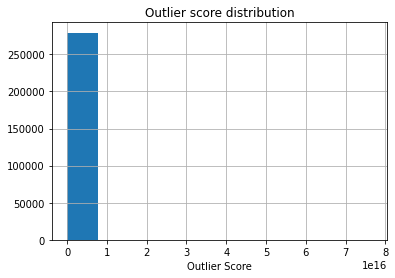

In [125]:
df_norm['lof_scores'] = lof_scores
df_norm['lof_scores'].hist()
plt.title("Outlier score distribution")
plt.xlabel("Outlier Score")

Text(0.5, 0, 'Outlier Score')

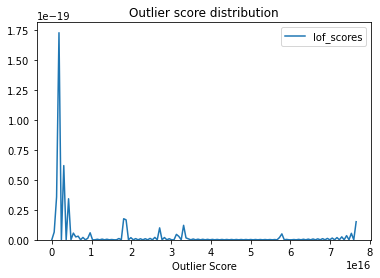

In [126]:
sns.kdeplot(df_norm['lof_scores'])
plt.title("Outlier score distribution")
plt.xlabel("Outlier Score")

In [20]:
df_norm.head()

,amount_product,amount_bill,lof_scores
0,0.651669,0.651669,1.0
1,-0.713696,-0.713696,1.0
2,0.651669,0.651669,1.0
3,0.354042,0.354042,1.0
4,0.651669,0.651669,1.0


In [21]:
finaldf.shape

(521367, 13)

In [22]:
newdf2 = pd.merge(finaldf,newdf1,on='id')

In [23]:
newdf2.shape

(419483, 15)

In [24]:
newdf2.drop(['amount_product_y','amount_bill_y','name.1'],axis=1,inplace=True)

In [26]:
newdf2.head()

,id,bill_no,created_on,amount_bill_x,channel,customer_id,location_id,product_id,amount_product_x,quantity,marketable_name,Item Color
0,91366609,9902,2019-10-11,7400,outlet,40213638,7453,982416.0,7400.0,1.0,Jackets-Macs,Stone
1,91366610,9718,2019-10-06,1895,outlet,40213639,7453,982411.0,1895.0,1.0,Skirts-Casual,Leopard
2,91366611,9957,2019-10-13,7400,outlet,40213640,7453,982417.0,7400.0,1.0,Dresses-Day,Black
3,91366617,497,2019-10-30,6200,outlet,40213646,7453,982422.0,6200.0,1.0,Jackets-Tailoring,Nude Shimmer
4,91366623,9899,2019-10-11,7400,outlet,40213652,7453,982425.0,7400.0,1.0,Jackets-Macs,Stone


In [27]:
newdf2.describe()

,id,amount_bill_x,customer_id,location_id,product_id,amount_product_x,quantity
count,4.135850e+05,413585.000000,4.135850e+05,413585.000000,4.135850e+05,413585.000000,413585.000000
mean,9.436684e+07,6537.545063,3.847007e+07,7500.754435,9.984556e+05,3241.193714,1.001066
std,5.694698e+06,6359.186275,9.178437e+06,63.136595,3.532246e+04,2303.081779,0.056548
min,9.136661e+07,1.000000,0.000000e+00,7453.000000,9.824100e+05,-17800.000000,1.000000
25%,9.150695e+07,2650.000000,4.022890e+07,7460.000000,9.855620e+05,1600.000000,1.000000
50%,9.161658e+07,4600.000000,4.026496e+07,7472.000000,9.895160e+05,2995.000000,1.000000
75%,9.692918e+07,8000.000000,4.031150e+07,7491.000000,9.933510e+05,4200.000000,1.000000
max,1.173725e+08,124000.000000,5.148944e+07,7622.000000,1.466232e+06,18000.000000,14.000000


In [142]:
newdf2['quantity'].unique()

array([ 1.,  2.,  3.,  8., 14.,  4.,  6., 10.])

In [29]:
newdf2.shape

(413585, 12)

In [30]:
newdf2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413585 entries, 0 to 419482
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id                413585 non-null  int64         
 1   bill_no           413585 non-null  object        
 2   created_on        413585 non-null  datetime64[ns]
 3   amount_bill_x     413585 non-null  int64         
 4   channel           413585 non-null  object        
 5   customer_id       413585 non-null  int64         
 6   location_id       413585 non-null  int64         
 7   product_id        413585 non-null  float64       
 8   amount_product_x  413585 non-null  float64       
 9   quantity          413585 non-null  float64       
 10  marketable_name   413585 non-null  object        
 11  Item Color        346935 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 41.0+ MB


In [31]:
newdf2['bill_no'] = newdf2['bill_no'].apply(str)

In [32]:
upt = newdf2.groupby(['id']).agg({'quantity':'sum'}).reset_index()
df1 = pd.merge(df1,upt,on='id').reset_index()
df1.head()

,index,id,bill_no,created_on,amount,channel,customer_id,location_id,quantity
0,0,91366609,9902,2019-10-11 00:00:00,7400,outlet,40213638,7453,1.0
1,1,91366610,9718,2019-10-06 00:00:00,1895,outlet,40213639,7453,1.0
2,2,91366611,9957,2019-10-13 00:00:00,7400,outlet,40213640,7453,1.0
3,3,91366617,497,2019-10-30 00:00:00,6200,outlet,40213646,7453,1.0
4,4,91366623,9899,2019-10-11 00:00:00,7400,outlet,40213652,7453,1.0


In [33]:
RFM_cust = df1.groupby(["customer_id"]).agg({'amount':'sum','bill_no':lambda x: x.nunique(),'created_on':max,'quantity':'sum'})

In [34]:
RFM_cust.head()

,amount,bill_no,created_on,quantity
customer_id,,,,
0,69107599,9747,2020-09-20 21:05:00,21791.0
40213634,90870,36,2020-09-09 19:38:37,54.0
40213635,57470,8,2020-06-11 18:45:09,35.0
40213636,5595,2,2019-04-09 00:00:00,2.0
40213638,15400,2,2019-10-11 00:00:00,3.0


In [35]:
RFM_cust = RFM_cust.reset_index()
RFM_cust = RFM_cust[RFM_cust['customer_id']!=0]
RFM_cust['ABV'] = RFM_cust['amount']/RFM_cust['bill_no']
RFM_cust['UPT'] = RFM_cust['quantity']/RFM_cust['bill_no']
RFM_cust.head()

,customer_id,amount,bill_no,created_on,quantity,ABV,UPT
1,40213634,90870,36,2020-09-09 19:38:37,54.0,2524.166667,1.500
2,40213635,57470,8,2020-06-11 18:45:09,35.0,7183.750000,4.375
3,40213636,5595,2,2019-04-09 00:00:00,2.0,2797.500000,1.000
4,40213638,15400,2,2019-10-11 00:00:00,3.0,7700.000000,1.500
5,40213639,1895,1,2019-10-06 00:00:00,1.0,1895.000000,1.000


In [36]:
import datetime

In [37]:
RFM_cust['created_on'] = pd.to_datetime(RFM_cust['created_on'],format='%Y-%m-%d %H:%M:%S')

In [38]:
last_date = RFM_cust['created_on'].max() +datetime.timedelta(days=1)
RFM_cust['last_day'] = last_date

In [39]:
RFM_cust.head()

,customer_id,amount,bill_no,created_on,quantity,ABV,UPT,last_day
1,40213634,90870,36,2020-09-09 19:38:37,54.0,2524.166667,1.500,2020-10-13 23:47:24
2,40213635,57470,8,2020-06-11 18:45:09,35.0,7183.750000,4.375,2020-10-13 23:47:24
3,40213636,5595,2,2019-04-09 00:00:00,2.0,2797.500000,1.000,2020-10-13 23:47:24
4,40213638,15400,2,2019-10-11 00:00:00,3.0,7700.000000,1.500,2020-10-13 23:47:24
5,40213639,1895,1,2019-10-06 00:00:00,1.0,1895.000000,1.000,2020-10-13 23:47:24


In [40]:
RFM_cust['recency'] = (RFM_cust['last_day'] - RFM_cust['created_on']).dt.days 
RFM_cust.drop(['created_on','last_day'],axis=1,inplace=True)

In [41]:
newdf2.head()

,id,bill_no,created_on,amount_bill_x,channel,customer_id,location_id,product_id,amount_product_x,quantity,marketable_name,Item Color
0,91366609,9902,2019-10-11,7400,outlet,40213638,7453,982416.0,7400.0,1.0,Jackets-Macs,Stone
1,91366610,9718,2019-10-06,1895,outlet,40213639,7453,982411.0,1895.0,1.0,Skirts-Casual,Leopard
2,91366611,9957,2019-10-13,7400,outlet,40213640,7453,982417.0,7400.0,1.0,Dresses-Day,Black
3,91366617,497,2019-10-30,6200,outlet,40213646,7453,982422.0,6200.0,1.0,Jackets-Tailoring,Nude Shimmer
4,91366623,9899,2019-10-11,7400,outlet,40213652,7453,982425.0,7400.0,1.0,Jackets-Macs,Stone


In [42]:
cat_sub_cust = pd.pivot_table(newdf2,index = ['customer_id'],columns = ['marketable_name'],values = ['amount_product_x'],aggfunc=np.sum)
cat_sub_cust.columns = ['_'.join(x) for x in cat_sub_cust.columns]
cat_sub_cust = cat_sub_cust.reset_index()
cat_sub_cust = cat_sub_cust[cat_sub_cust['customer_id']!=0]
cat_sub_cust.head()

,customer_id,amount_product_x_Activewear-Hoodie,amount_product_x_Activewear-Pants,amount_product_x_Activewear-Tops,amount_product_x_Bottoms-Pants,amount_product_x_Cutand Sew,amount_product_x_Denim Separates-Dresses,amount_product_x_Denim Separates-Jackets,amount_product_x_Denim Separates-Shorts,amount_product_x_Denim Separates-Skirts,...,amount_product_x_Softgoods-Capes,amount_product_x_Softgoods-Racing,amount_product_x_Softgoods-Scarves,amount_product_x_Softgoods-Small Softs,amount_product_x_Tops-Blouses,amount_product_x_Tops-Camis/Tanks,amount_product_x_Tops-Cut and Sew,amount_product_x_Tops-Fashion Tops,amount_product_x_Tops-Shirts/Tunics,amount_product_x_Tops-T-Shirts
1,40213634,NaN,NaN,NaN,NaN,NaN,4300.0,NaN,NaN,NaN,...,NaN,NaN,1700.0,495.0,3901.0,NaN,3601.0,NaN,2001.0,595.0
2,40213635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1600.0,NaN,11180.0,NaN,NaN,NaN,5990.0,NaN
3,40213636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40213638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,40213639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
chan_cust = pd.pivot_table(df1,index = ['customer_id'],columns = ['channel'],values = ['amount'],aggfunc=np.sum)
chan_cust.columns = ['_'.join(x) for x in chan_cust.columns]
chan_cust = chan_cust.reset_index()
chan_cust = chan_cust[chan_cust['customer_id']!=0]
chan_cust.head()

,customer_id,amount_outlet,amount_website
1,40213634,90870.0,NaN
2,40213635,57470.0,NaN
3,40213636,5595.0,NaN
4,40213638,15400.0,NaN
5,40213639,1895.0,NaN


In [143]:
color_cust = pd.pivot_table(newdf2,index = ['customer_id'],columns = ['Item Color'],values = ['amount_product_x'],aggfunc=np.sum)
color_cust.columns = ['_'.join(x) for x in color_cust.columns]
color_cust = color_cust.reset_index()
color_cust = color_cust[color_cust['customer_id']!=0]
color_cust.head()

,customer_id,amount_product_x_70`s Teal,amount_product_x_Admiral Blue,amount_product_x_Aegean,amount_product_x_After Dark,amount_product_x_Angel Blue,amount_product_x_Angel Dust,amount_product_x_Angelic Pink,amount_product_x_Antique Almond,amount_product_x_Antique Blush,...,amount_product_x_mono check,amount_product_x_pink floral,amount_product_x_pink peony,amount_product_x_plum,amount_product_x_red plum,amount_product_x_snake print,amount_product_x_soft blue,amount_product_x_spot,amount_product_x_vibrant red,amount_product_x_wine
1,40213634,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3900.0,NaN,NaN,NaN,NaN,NaN,NaN
2,40213635,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40213636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40213638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,40213639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
df1['location_id'] = df1['location_id'].astype(str)
loc_cust = pd.pivot_table(df1,index = ['customer_id'],columns = ['location_id'],values = ['amount'],aggfunc=np.sum)
loc_cust.columns = ['_'.join(x) for x in loc_cust.columns]
loc_cust = loc_cust.reset_index()
loc_cust = loc_cust[loc_cust['customer_id']!=0]
loc_cust.head()

,customer_id,amount_7453,amount_7454,amount_7456,amount_7457,amount_7458,amount_7459,amount_7460,amount_7462,amount_7463,...,amount_7494,amount_7495,amount_7496,amount_7497,amount_7498,amount_7504,amount_7505,amount_7620,amount_7621,amount_7622
1,40213634,90870.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40213635,49470.0,8000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40213636,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40213638,15400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,40213639,1895.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [144]:
#Creating a single data frame for clustering
clustering_df = pd.merge(RFM_cust,color_cust,how='left',on='customer_id')
clustering_df = pd.merge(clustering_df,cat_sub_cust,how='left',on='customer_id')
clustering_df = pd.merge(clustering_df,chan_cust,how='left',on='customer_id')
clustering_df = pd.merge(clustering_df,loc_cust,how='left',on='customer_id')
clustering_df.head()

,customer_id,amount,bill_no,quantity,ABV,UPT,recency,amount_product_x_70`s Teal,amount_product_x_Admiral Blue,amount_product_x_Aegean,...,amount_7494,amount_7495,amount_7496,amount_7497,amount_7498,amount_7504,amount_7505,amount_7620,amount_7621,amount_7622
0,40213634,90870,36,54.0,2524.166667,1.500,34,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,40213635,57470,8,35.0,7183.750000,4.375,124,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,40213636,5595,2,2.0,2797.500000,1.000,553,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,40213638,15400,2,3.0,7700.000000,1.500,368,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,40213639,1895,1,1.0,1895.000000,1.000,373,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
clustering_df['ABV'] = clustering_df['ABV'].round(2)
clustering_df['UPT'] = clustering_df['UPT'].round(2)
clustering_df = clustering_df[clustering_df['ABV']!=np.inf]
clustering_df = clustering_df.reset_index()
clustering_df.head()

,index,customer_id,amount,bill_no,quantity,ABV,UPT,recency,amount_product_x_70`s Teal,amount_product_x_Admiral Blue,...,amount_7494,amount_7495,amount_7496,amount_7497,amount_7498,amount_7504,amount_7505,amount_7620,amount_7621,amount_7622
0,0,40213634,90870,36,54.0,2524.17,1.50,34,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,40213635,57470,8,35.0,7183.75,4.38,124,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,40213636,5595,2,2.0,2797.50,1.00,553,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,40213638,15400,2,3.0,7700.00,1.50,368,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,40213639,1895,1,1.0,1895.00,1.00,373,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
clustering_df.drop(['index'],axis=1,inplace=True)

In [49]:
customers = clustering_df[['customer_id']]
customers_kmeans = clustering_df.iloc[:,1:]

In [50]:
customers_kmeans = customers_kmeans.fillna(0)

In [51]:
customers_kmeans.head()

,amount,bill_no,quantity,ABV,UPT,recency,amount_product_x_70`s Teal,amount_product_x_Admiral Blue,amount_product_x_Aegean,amount_product_x_After Dark,...,amount_7494,amount_7495,amount_7496,amount_7497,amount_7498,amount_7504,amount_7505,amount_7620,amount_7621,amount_7622
0,90870,36,54.0,2524.17,1.50,34,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,57470,8,35.0,7183.75,4.38,124,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5595,2,2.0,2797.50,1.00,553,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15400,2,3.0,7700.00,1.50,368,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1895,1,1.0,1895.00,1.00,373,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


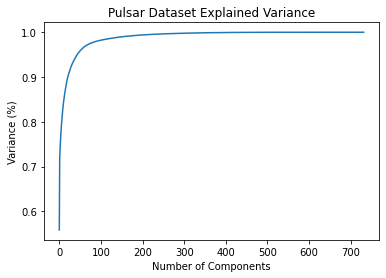

In [53]:
#Fitting the PCA algorithm with our Data
from sklearn.decomposition import PCA
pca = PCA().fit(customers_kmeans)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [54]:
pca_df = pd.DataFrame(pd.Series(pca.explained_variance_ratio_))
pca_df.to_csv('var.csv')

In [55]:
pca = PCA(n_components=22)
dataset = pca.fit_transform(customers_kmeans)

principal_22 = pd.DataFrame(data = dataset)

In [57]:
# sum of squared distances
from sklearn.cluster import KMeans
ssd = []
for num_clusters in list(range(1,15)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=100)
    model_clus.fit(principal_22)
    ssd.append(model_clus.inertia_)

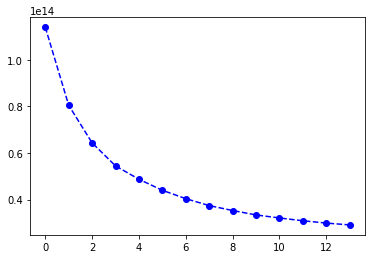

In [58]:
plt.plot(ssd, '--bo')

In [63]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 3, max_iter=300)
model_clus5.fit(principal_22)

KMeans(n_clusters=3)

In [67]:
# analysis of clusters formed
clusters_3 = pd.concat([customers[['customer_id']], pd.Series(model_clus5.labels_)], axis=1)
clusters_3.columns = ['customer_id', 'ClusterID']

In [146]:
clusters_3.groupby('ClusterID').count()

,customer_id,amount,bill_no,quantity,ABV,UPT,recency
ClusterID,,,,,,,
1,376,376,376,376,376,376,376
2,9690,9690,9690,9690,9690,9690,9690
3,79381,79381,79381,79381,79381,79381,79381
4,33690,33690,33690,33690,33690,33690,33690
5,4998,4998,4998,4998,4998,4998,4998


In [70]:
clusters_3 = pd.merge(clusters_3,RFM_cust,how='left',on='customer_id')

In [71]:
clusters_3.head()

,customer_id,ClusterID,amount,bill_no,quantity,ABV,UPT,recency
0,40213634,2,90870,36,54.0,2524.166667,1.500,34
1,40213635,2,57470,8,35.0,7183.750000,4.375,124
2,40213636,0,5595,2,2.0,2797.500000,1.000,553
3,40213638,0,15400,2,3.0,7700.000000,1.500,368
4,40213639,0,1895,1,1.0,1895.000000,1.000,373


In [145]:
clusters_3.groupby(['ClusterID']).mean()

,customer_id,amount,bill_no,quantity,ABV,UPT,recency
ClusterID,,,,,,,
1,4.027719e+07,205335.994681,27.968085,54.941489,8739.972749,2.293005,113.382979
2,4.040100e+07,42914.800000,6.954902,12.214757,8097.690590,2.088847,276.636017
3,4.083354e+07,3683.443141,1.215518,1.517983,3175.273175,1.245313,554.239440
4,4.063365e+07,12254.595518,2.083378,3.140635,7213.908952,1.623198,481.291333
5,4.107763e+07,14625.456983,2.848940,5.383954,6723.568860,2.097560,307.466787


In [75]:
cluster1_ = clusters_3[['ClusterID','customer_id']]
cluster1_ = cluster1_[cluster1_['ClusterID']==0]

cluster1_ = pd.merge(cluster1_,clustering_df,how='left',on='customer_id')
cluster1_.head()

,ClusterID,customer_id,amount,bill_no,quantity,ABV,UPT,recency,amount_product_x_70`s Teal,amount_product_x_Admiral Blue,...,amount_7494,amount_7495,amount_7496,amount_7497,amount_7498,amount_7504,amount_7505,amount_7620,amount_7621,amount_7622
0,0,40213636,5595,2,2.0,2797.5,1.0,553,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,40213638,15400,2,3.0,7700.0,1.5,368,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,40213639,1895,1,1.0,1895.0,1.0,373,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,40213640,15400,2,2.0,7700.0,1.0,366,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,40213641,6400,1,1.0,6400.0,1.0,386,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
cluster1_.drop(['ClusterID'],axis=1,inplace=True)
customers_clus1 = cluster1_[['customer_id']]
customers_kmeans_clus1 = cluster1_.iloc[:,1:]
customers_kmeans_clus1 = customers_kmeans_clus1.fillna(0)
customers_kmeans_clus1.head()

,amount,bill_no,quantity,ABV,UPT,recency,amount_product_x_70`s Teal,amount_product_x_Admiral Blue,amount_product_x_Aegean,amount_product_x_After Dark,...,amount_7494,amount_7495,amount_7496,amount_7497,amount_7498,amount_7504,amount_7505,amount_7620,amount_7621,amount_7622
0,5595,2,2.0,2797.5,1.0,553,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,15400,2,3.0,7700.0,1.5,368,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1895,1,1.0,1895.0,1.0,373,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,15400,2,2.0,7700.0,1.0,366,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6400,1,1.0,6400.0,1.0,386,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


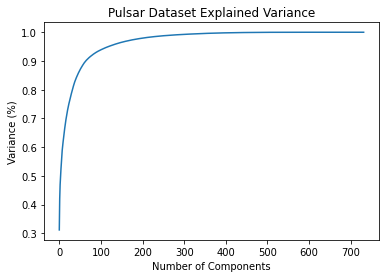

In [78]:
#Fitting the PCA algorithm with our Data
from sklearn.decomposition import PCA
pca = PCA().fit(customers_kmeans_clus1)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [80]:
pca_df = pd.DataFrame(pd.Series(pca.explained_variance_ratio_))
pca_df.to_csv('var.csv')

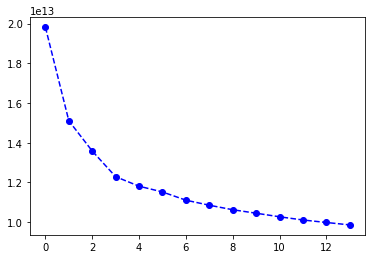

In [81]:
pca = PCA(n_components=64)
dataset = pca.fit_transform(customers_kmeans_clus1)

principal_64= pd.DataFrame(data = dataset)

# sum of squared distances
from sklearn.cluster import KMeans
ssd = []
for num_clusters in list(range(1,15)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=100)
    model_clus.fit(principal_64)
    ssd.append(model_clus.inertia_)
    
plt.plot(ssd, '--bo')

In [82]:
# Kmeans with K=5
model_clus5 = KMeans(n_clusters = 3, max_iter=300)
model_clus5.fit(principal_64)

# analysis of clusters formed
clusters_clus1_3 = pd.concat([customers_clus1[['customer_id']], pd.Series(model_clus5.labels_)], axis=1)
clusters_clus1_3.columns = ['customer_id', 'ClusterID']
clusters_clus1_3 = pd.merge(clusters_clus1_3,RFM_cust,how='left',on='customer_id')

In [83]:
clusters_clus1_3.groupby(['ClusterID']).count()

,customer_id,amount,bill_no,quantity,ABV,UPT,recency
ClusterID,,,,,,,
0,79381,79381,79381,79381,79381,79381,79381
1,33690,33690,33690,33690,33690,33690,33690
2,4998,4998,4998,4998,4998,4998,4998


In [89]:
clusters_clus1_3.groupby(['ClusterID']).median()

,customer_id,amount,bill_no,quantity,ABV,UPT,recency
ClusterID,,,,,,,
0,40296803.0,3490.0,1.0,1.0,2995.00,1.000000,592.0
1,40274814.0,11080.0,2.0,3.0,7100.00,1.250000,515.0
2,40357474.5,13397.5,2.0,4.0,5564.25,1.666667,288.0


In [92]:
clusters_clus1_3['ClusterID'][(clusters_clus1_3['ClusterID']==0)] = 3
clusters_clus1_3['ClusterID'][(clusters_clus1_3['ClusterID']==1)] = 4
clusters_clus1_3['ClusterID'][(clusters_clus1_3['ClusterID']==2)] = 5

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we c

In [93]:
clusters_3 = clusters_3[clusters_3['ClusterID']!=0].reset_index()

In [94]:
clusters_3 = pd.concat([clusters_3,clusters_clus1_3])

In [100]:
clusters_3.drop(['index'],axis=1,inplace=True)

In [101]:
clusters_3.groupby(['ClusterID']).mean()

,customer_id,amount,bill_no,quantity,ABV,UPT,recency
ClusterID,,,,,,,
1,4.027719e+07,205335.994681,27.968085,54.941489,8739.972749,2.293005,113.382979
2,4.040100e+07,42914.800000,6.954902,12.214757,8097.690590,2.088847,276.636017
3,4.083354e+07,3683.443141,1.215518,1.517983,3175.273175,1.245313,554.239440
4,4.063365e+07,12254.595518,2.083378,3.140635,7213.908952,1.623198,481.291333
5,4.107763e+07,14625.456983,2.848940,5.383954,6723.568860,2.097560,307.466787


In [103]:
import pandas as pd
import numpy as np
from scipy import sparse
from lightfm import LightFM
from sklearn.metrics.pairwise import cosine_similarity


def create_interaction_matrix(df, user_col, item_col, rating_col, norm=False, threshold=None):
    '''
    Function to create an interaction matrix dataframe from transactional type interactions
    Required Input -
        - df = Pandas DataFrame containing user-item interactions
        - user_col = column name containing user's identifier
        - item_col = column name containing item's identifier
        - rating col = column name containing user feedback on interaction with a given item
        - norm (optional) = True if a normalization of ratings is needed
        - threshold (required if norm = True) = value above which the rating is favorable
    Expected output -
        - Pandas dataframe with user-item interactions ready to be fed in a recommendation algorithm
    '''
    interactions = df.groupby([user_col, item_col])[rating_col] \
        .sum().unstack().reset_index(). \
        fillna(0).set_index(user_col)
    if norm:
        interactions = interactions.applymap(lambda x: 1 if x > threshold else -1)
    return interactions


def create_user_dict(interactions):
    '''
    Function to create a user dictionary based on their index and number in interaction dataset
    Required Input -
        interactions - dataset create by create_interaction_matrix
    Expected Output -
        user_dict - Dictionary type output containing interaction_index as key and user_id as value
    '''
    user_id = list(interactions.index)
    user_dict = {}
    counter = 0
    for i in user_id:
        user_dict[i] = counter
        counter += 1
    return user_dict


def create_item_dict(df, id_col, name_col):
    '''
    Function to create an item dictionary based on their item_id and item name
    Required Input -
        - df = Pandas dataframe with Item information
        - id_col = Column name containing unique identifier for an item
        - name_col = Column name containing name of the item
    Expected Output -
        item_dict = Dictionary type output containing item_id as key and item_name as value
    '''
    item_dict = {}
    for i in range(df.shape[0]):
        item_dict[(df.loc[i, id_col])] = df.loc[i, name_col]
    return item_dict


def runMF(interactions, n_components=30, loss='warp', k=15, epoch=30, n_jobs=4):
    '''
    Function to run matrix-factorization algorithm
    Required Input -
        - interactions = dataset create by create_interaction_matrix
        - n_components = number of embeddings you want to create to define Item and user
        - loss = loss function other options are logistic, brp
        - epoch = number of epochs to run
        - n_jobs = number of cores used for execution
    Expected Output  -
        Model - Trained model
    '''
    x = sparse.csr_matrix(interactions.values)
    model = LightFM(no_components=n_components, loss=loss, k=k)
    model.fit(x, epochs=epoch, num_threads=n_jobs)
    return model


def sample_recommendation_user(model, interactions, user_id, user_dict,
                               item_dict, threshold=0, nrec_items=10, show=True):
    '''
    Function to produce user recommendations
    Required Input -
        - model = Trained matrix factorization model
        - interactions = dataset used for training the model
        - user_id = user ID for which we need to generate recommendation
        - user_dict = Dictionary type input containing interaction_index as key and user_id as value
        - item_dict = Dictionary type input containing item_id as key and item_name as value
        - threshold = value above which the rating is favorable in new interaction matrix
        - nrec_items = Number of output recommendation needed
    Expected Output -
        - Prints list of items the given user has already bought
        - Prints list of N recommended items  which user hopefully will be interested in
    '''
    n_users, n_items = interactions.shape
    user_x = user_dict[user_id]
    scores = pd.Series(model.predict(user_x, np.arange(n_items)))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))

    known_items = list(pd.Series(interactions.loc[user_id, :] \
                                     [interactions.loc[user_id, :] > threshold].index) \
                       .sort_values(ascending=False))

    scores = [x for x in scores if x not in known_items]
    return_score_list = scores[0:nrec_items]
    known_items = list(pd.Series(known_items).apply(lambda x: item_dict[x]))
    scores = list(pd.Series(return_score_list).apply(lambda x: item_dict[x]))
    if show == True:
        print("Known Likes:")
        counter = 1
        for i in known_items:
            print(str(counter) + '- ' + i)
            counter += 1

        print("\n Recommended Items:")
        counter = 1
        for i in scores:
            print(str(counter) + '- ' + i)
            counter += 1
    return return_score_list


def sample_recommendation_item(model, interactions, item_id, user_dict, item_dict, number_of_user):
    '''
    Funnction to produce a list of top N interested users for a given item
    Required Input -
        - model = Trained matrix factorization model
        - interactions = dataset used for training the model
        - item_id = item ID for which we need to generate recommended users
        - user_dict =  Dictionary type input containing interaction_index as key and user_id as value
        - item_dict = Dictionary type input containing item_id as key and item_name as value
        - number_of_user = Number of users needed as an output
    Expected Output -
        - user_list = List of recommended users
    '''
    n_users, n_items = interactions.shape
    x = np.array(interactions.columns)
    scores = pd.Series(model.predict(np.arange(n_users), np.repeat(x.searchsorted(item_id), n_users)))
    user_list = list(interactions.index[scores.sort_values(ascending=False).head(number_of_user).index])
    return user_list


def create_item_emdedding_distance_matrix(model, interactions):
    '''
    Function to create item-item distance embedding matrix
    Required Input -
        - model = Trained matrix factorization model
        - interactions = dataset used for training the model
    Expected Output -
        - item_emdedding_distance_matrix = Pandas dataframe containing cosine distance matrix b/w items
    '''
    df_item_norm_sparse = sparse.csr_matrix(model.item_embeddings)
    similarities = cosine_similarity(df_item_norm_sparse)
    item_emdedding_distance_matrix = pd.DataFrame(similarities)
    item_emdedding_distance_matrix.columns = interactions.columns
    item_emdedding_distance_matrix.index = interactions.columns
    return item_emdedding_distance_matrix


def item_item_recommendation(item_emdedding_distance_matrix, item_id,
                             item_dict, n_items=10, show=True):
    '''
    Function to create item-item recommendation
    Required Input -
        - item_emdedding_distance_matrix = Pandas dataframe containing cosine distance matrix b/w items
        - item_id  = item ID for which we need to generate recommended items
        - item_dict = Dictionary type input containing item_id as key and item_name as value
        - n_items = Number of items needed as an output
    Expected Output -
        - recommended_items = List of recommended items
    '''
    recommended_items = list(pd.Series(item_emdedding_distance_matrix.loc[item_id, :]. \
                                       sort_values(ascending=False).head(n_items + 1). \
                                       index[1:n_items + 1]))
    if show == True:
        print("Item of interest :{0}".format(item_dict[item_id]))
        print("Item similar to the above item:")
        counter = 1
        for i in recommended_items:
            print(str(counter) + '- ' + item_dict[i])
            counter += 1
    return recommended_items



#df will have columns customer_id,name and quantity
def recommendation_engine(df):
    interactions = create_interaction_matrix(df=df,
                                                 user_col='customer_id',
                                                 item_col='name',
                                                 rating_col='quantity')

    # Create User Dict
    user_dict = create_user_dict(interactions=interactions)
    # Create Item dict
    cat_dict = create_item_dict(df=df,
                                id_col='name',
                                name_col='name')

    mf_model = runMF(interactions=interactions,
                     n_components=30,
                     loss='warp',
                     epoch=100,
                     n_jobs=2)

    n_users, n_items = interactions.shape
    x = np.array(interactions.columns)
    scores = pd.DataFrame()
    for item in x:
        score = list(mf_model.predict(np.arange(n_users), np.repeat(x.searchsorted(item), n_users)))
        interaction = interactions[item].tolist()
        known_users = np.nonzero(interaction)[0]
        for user in known_users:
            score[user] = -100
        scores[item] = score

    scores.index = interactions.index

    recommendation = scores.idxmax(axis=1).to_frame(name='recommendation')
    recommendation.index = scores.index
    return recommendation

C:\Users\DELL\Anaconda3\lib\site-packages\lightfm\_lightfm_fast.py:9: UserWarning: LightFM was compiled without OpenMP support. Only a single thread will be used.
  warnings.warn('LightFM was compiled without OpenMP support. '


In [106]:
df = newdf2.groupby(['customer_id','marketable_name']).agg({'quantity':sum}).reset_index()
df = df[df['customer_id']!=0]
df.head()

,customer_id,marketable_name,quantity
61,40213634,Denim Separates-Dresses,2.0
62,40213634,Dresses-Day,5.0
63,40213634,Dresses-PM,5.0
64,40213634,Footwear-Heels,1.0
65,40213634,Handbags-Bags,3.0


In [107]:
df = pd.merge(df,clusters_3[['customer_id','ClusterID']],how='left',on='customer_id')
df.head()

,customer_id,marketable_name,quantity,ClusterID
0,40213634,Denim Separates-Dresses,2.0,2
1,40213634,Dresses-Day,5.0,2
2,40213634,Dresses-PM,5.0,2
3,40213634,Footwear-Heels,1.0,2
4,40213634,Handbags-Bags,3.0,2


In [110]:
df = df.rename({'marketable_name':'name'},axis=1)
df.head()

,customer_id,name,quantity,ClusterID
0,40213634,Denim Separates-Dresses,2.0,2
1,40213634,Dresses-Day,5.0,2
2,40213634,Dresses-PM,5.0,2
3,40213634,Footwear-Heels,1.0,2
4,40213634,Handbags-Bags,3.0,2


In [136]:
df.shape

(283328, 4)

In [138]:
final_recommendation = pd.DataFrame(columns=['customer_id','recommendation'])
for i in list(set(df['ClusterID'])):
    df_temp = df[df['ClusterID']==i] 
    df_temp = df_temp.reset_index()
    rec = recommendation_engine(df_temp[['customer_id','name','quantity']])
    rec = rec.reset_index()
    final_recommendation = pd.concat([final_recommendation,rec])

In [139]:
final_recommendation.shape

(128135, 2)

In [140]:
final_recommendation.head()

,customer_id,recommendation
0,40213645,Pants-Fashion
1,40213652,Petite-Skirts
2,40213673,Shorts-Shorties
3,40213737,Resort-Bottoms
4,40213745,Footwear-Flats


In [141]:
final_recommendation.groupby(['recommendation']).count()

,customer_id
recommendation,
Activewear-Hoodie,1
Activewear-Pants,91
Activewear-Tops,168
Cutand Sew,4
Denim Separates-Dresses,985
...,...
Tops-Camis/Tanks,1352
Tops-Cut and Sew,1462
Tops-Fashion Tops,1054
